In [1]:
from keras.models import load_model

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread

2023-12-08 16:37:02.121912: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


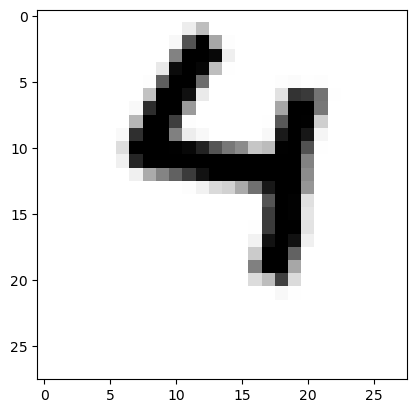

In [2]:
my_num = imread("static/img28.png")
my_num = 1.0 - my_num
plt.imshow(my_num, cmap='Greys')

In [3]:
mdl = load_model('mnist3.mdl')

2023-12-08 16:37:05.327783: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [64]:
l = mdl.layers[0]
w = l.weights[0].numpy().squeeze()
b = l.weights[1].numpy().squeeze()
N0, _, K0 = w.shape
f0 = np.array([[[np.clip(np.sum(my_num[i:i+N0, j:j+N0] * w[:, :, k]) + b[k], -0, 999) for j in range(28-N0+1)] for i in range(28-N0+1)] for k in range(K0)])
K1, N1, _ = f0.shape
S1 = 2
f1 = np.array([[[np.max(f0[k,i:i+S1-1,:][:,j:j+S1-1]) for j in range(0, N1-S1+1, S1)] for i in range(0, N1-S1+1, S1)]for k in range(K1)])
K2, N2, _ = f1.shape

In [81]:
mx = my_num.max()
mn = my_num.min()
fg, ax = plt.subplots()
ax.pcolormesh(my_num[::-1, :], cmap='Reds', vmin=mn, vmax=mx)
for i in range(29):
    ax.plot([0, 29], [i, i], 'w') 
    ax.plot([i, i], [0, 29], 'w') 
ax.set_axis_off()
ax.set_aspect('equal', 'box')
fg.tight_layout()
fg.savefig(f'static/lay{0}.png', dpi=70)
plt.close(fg)

mx = w.max()
mn = w.min()
for k in range(K0):
    fg, ax = plt.subplots()
    ax.pcolormesh(w[:, :, k], cmap='Reds', vmin=mn, vmax=mx)
    for i in range(N0+1):
        ax.plot([0, N0], [i, i], 'w') 
        ax.plot([i, i], [0, N0], 'w') 
    ax.set_axis_off()
    ax.set_aspect('equal', 'box')
    fg.tight_layout()
    fg.savefig(f'static/lay{0}_weight{k}.png', dpi=70)
    plt.close(fg)

mx = f1.max()
mn = f1.min()
for k in range(K2):
    fg, ax = plt.subplots()
    ax.pcolormesh(f1[k, :, :], cmap='Reds', vmin=mn, vmax=mx)
    for i in range(N2+1):
        ax.plot([0, N2], [i, i], 'w') 
        ax.plot([i, i], [0, N2], 'w') 
    ax.set_axis_off()
    ax.set_aspect('equal', 'box')
    fg.tight_layout()
    fg.savefig(f'static/lay{0}_out{k}.png', dpi=70)
    plt.close(fg)

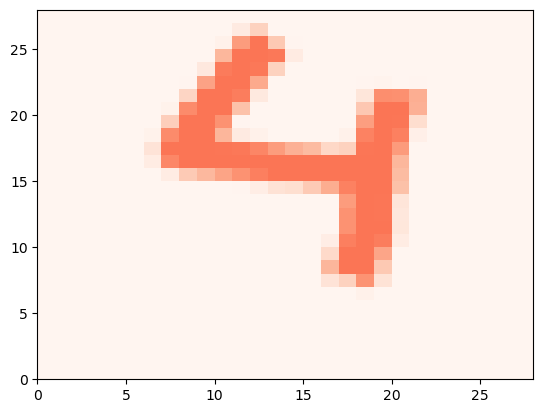

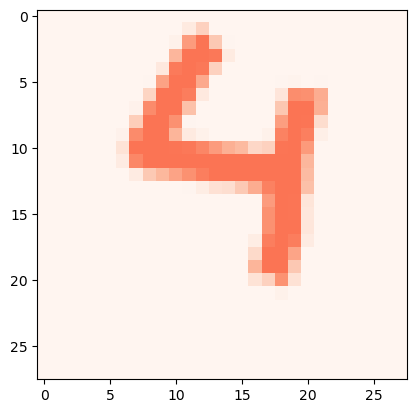

In [80]:
fg, ax = plt.subplots()
ax.pcolormesh(my_num[::-1,:], cmap='Reds', vmin=mn, vmax=mx)
fg, ax = plt.subplots()
ax.imshow(my_num, cmap='Reds', vmin=mn, vmax=mx)


In [13]:
[ix[j:j+5] for j in range(30-5)]

[[0, 1, 2, 3, 4],
 [1, 2, 3, 4, 5],
 [2, 3, 4, 5, 6],
 [3, 4, 5, 6, 7],
 [4, 5, 6, 7, 8],
 [5, 6, 7, 8, 9],
 [6, 7, 8, 9, 10],
 [7, 8, 9, 10, 11],
 [8, 9, 10, 11, 12],
 [9, 10, 11, 12, 13],
 [10, 11, 12, 13, 14],
 [11, 12, 13, 14, 15],
 [12, 13, 14, 15, 16],
 [13, 14, 15, 16, 17],
 [14, 15, 16, 17, 18],
 [15, 16, 17, 18, 19],
 [16, 17, 18, 19, 20],
 [17, 18, 19, 20, 21],
 [18, 19, 20, 21, 22],
 [19, 20, 21, 22, 23],
 [20, 21, 22, 23, 24],
 [21, 22, 23, 24, 25],
 [22, 23, 24, 25, 26],
 [23, 24, 25, 26, 27],
 [24, 25, 26, 27]]